In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
## read the csv file
df = pd.read_csv('fandango_scrape.csv')

In [3]:
## explore the dataframe
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

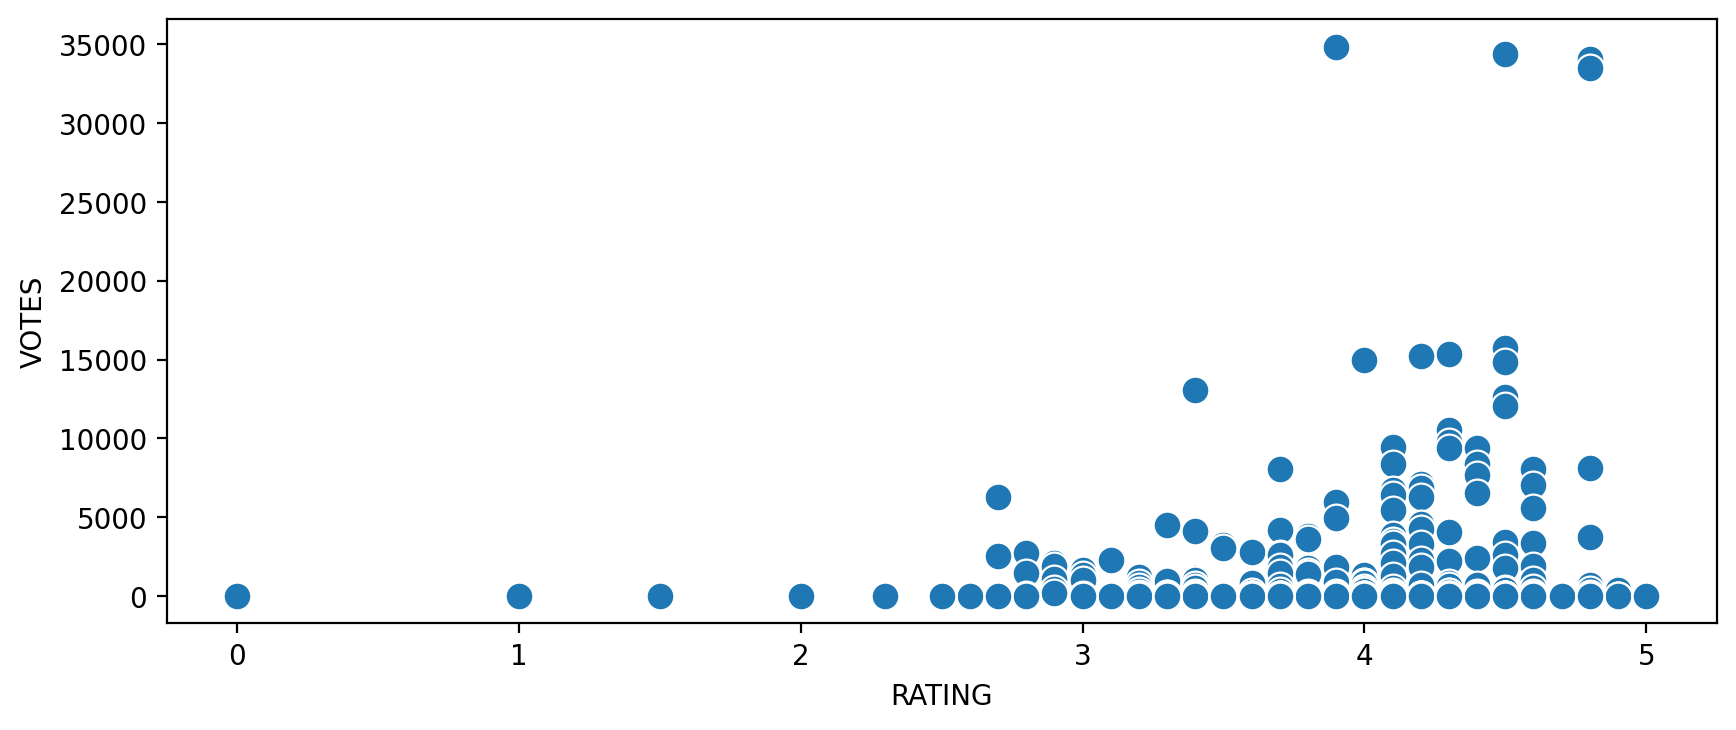

In [6]:
## Create scatterplot
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, y='VOTES', x='RATING', s=100)

In [7]:
df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
df[['FILM']]

,FILM
0,Fifty Shades of Grey (2015)
1,Jurassic World (2015)
2,American Sniper (2015)
3,Furious 7 (2015)
4,Inside Out (2015)
...,...
499,Valiyavan (2015)
500,WWE SummerSlam 2015 (2015)
501,Yagavarayinum Naa Kaakka (2015)
502,"Yesterday, Today and Tomorrow (1964)"


In [9]:
## try to extract the year
title = 'Film Title Name (Year)'

In [10]:
title.split('(')

['Film Title Name ', 'Year)']

In [11]:
title.split('(')[-1]

'Year)'

In [12]:
title.split('(')[-1].replace(')','')

'Year'

In [13]:
## apply our method into lambda expression
# to extract the year from the film title
df['YEAR'] = df['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

In [14]:
df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [15]:
df['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

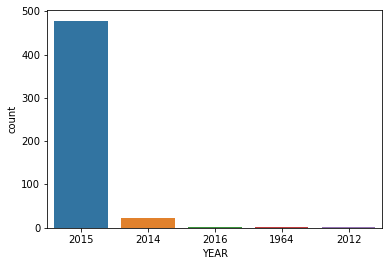

In [16]:
## create count plot
sns.countplot(data=df, x='YEAR')

In [17]:
## grab 10 highest VOTES movie
df.nlargest(n=10, columns='VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [18]:
## see movies with 0 votes
df[df['VOTES'] == 0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [19]:
len(df[df['VOTES'] == 0])

69

In [20]:
## create new dataframe by removing 0 votes
fan_reviewed = df[df['VOTES']>0]

In [21]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


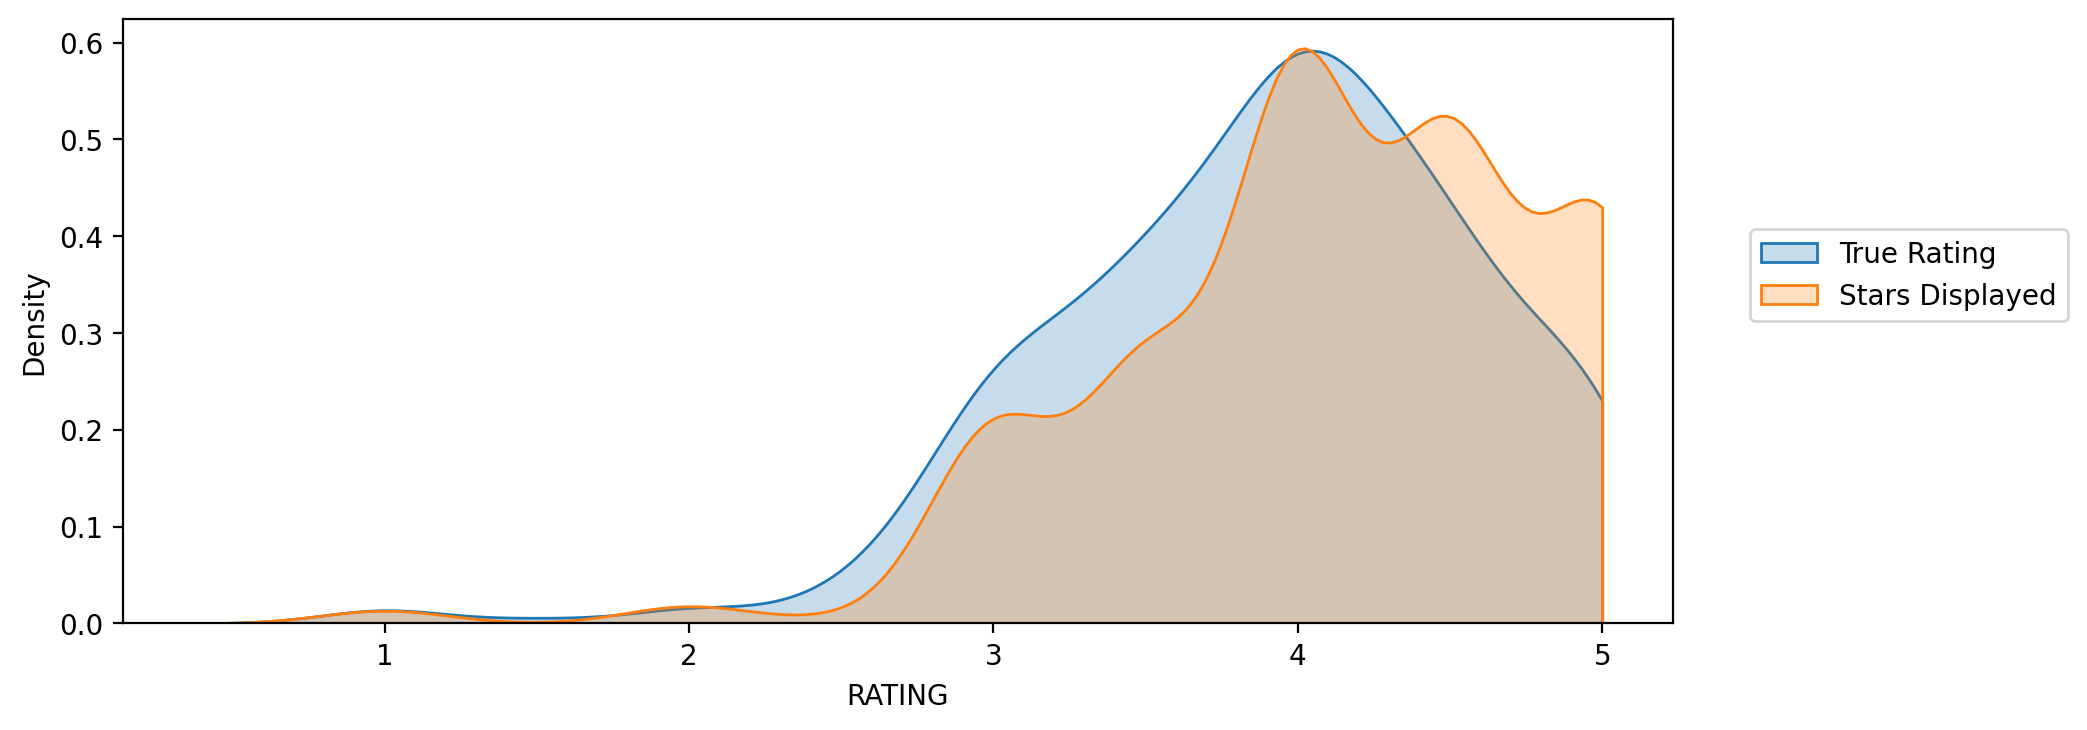

In [22]:
## plot kde for
# True rating & Stars Displayed
plt.figure(figsize=(10,4), dpi=200)

sns.kdeplot(data=fan_reviewed,x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS', clip=[0,5], fill=True, label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

In [23]:
# crrate new column of star_diff from
# Displayed Stars - True Rating
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

C:\Users\asus\AppData\Local\Temp\ipykernel_5204\2256128959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [24]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\asus\AppData\Local\Temp\ipykernel_5204\1229596765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

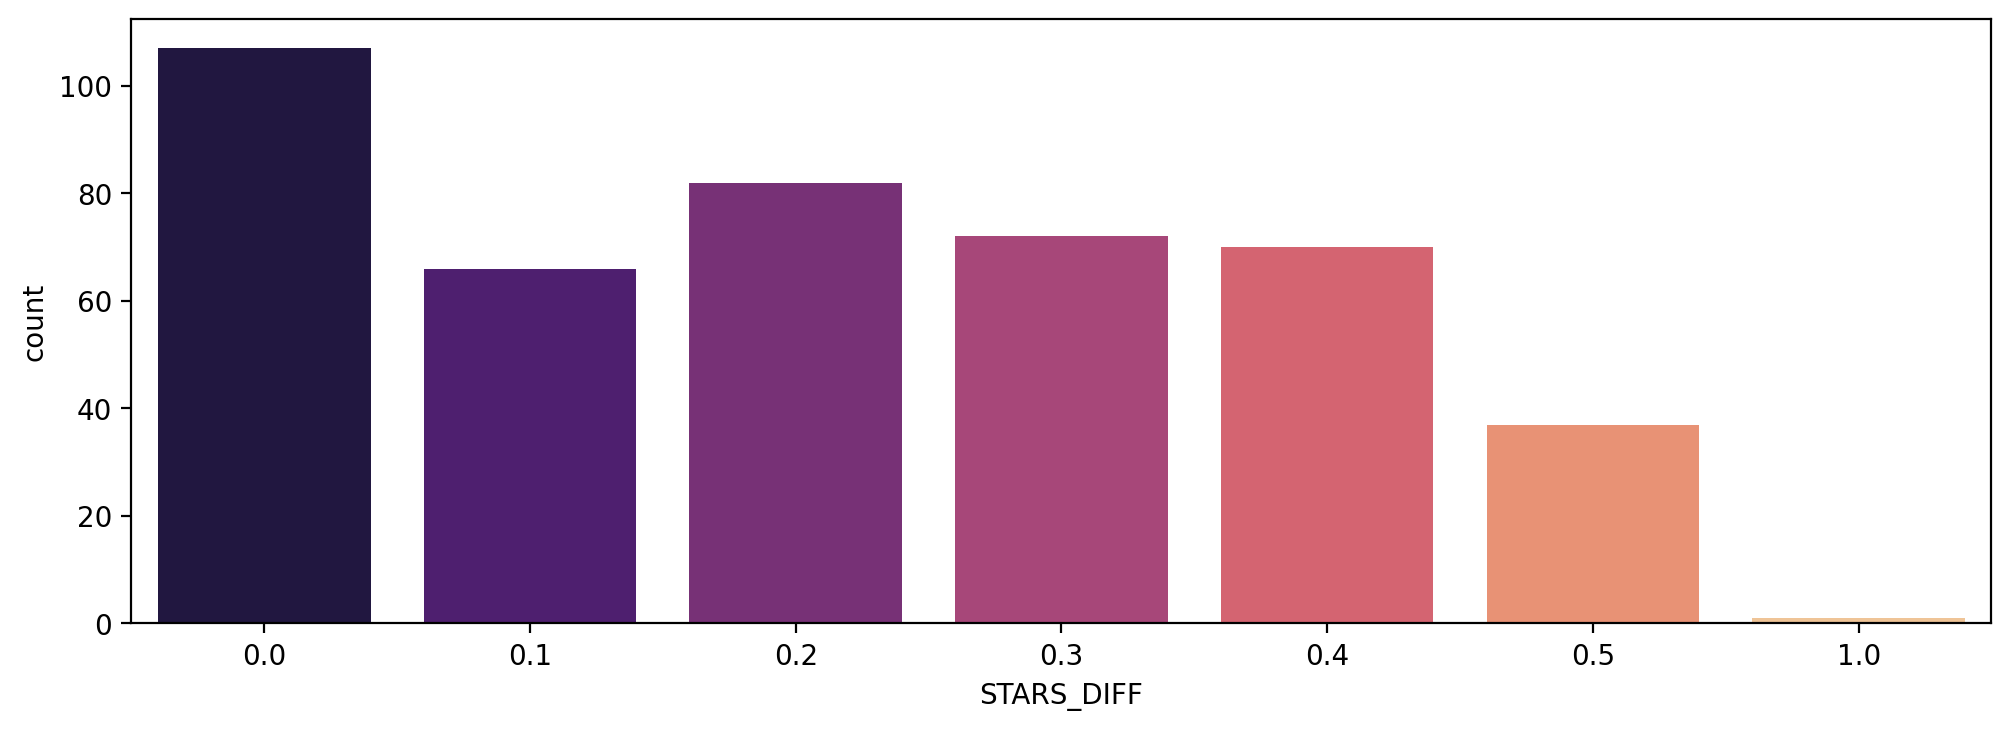

In [25]:
plt.figure(figsize=(12,4),dpi=200)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma')

This plot can be interpreted that, there is a movie that displayed 1 more star than the actual rating!!!!

Also, there are some movies that Fandango actually displayed the star more than there actual rating.

In [26]:
# look for that movie with 1 differential star
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [27]:
df2 = pd.read_csv("all_sites_scores.csv")

In [28]:
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [30]:
df2.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [31]:
df2.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

## ROTTEN TOMATOES

(0.0, 110.0)

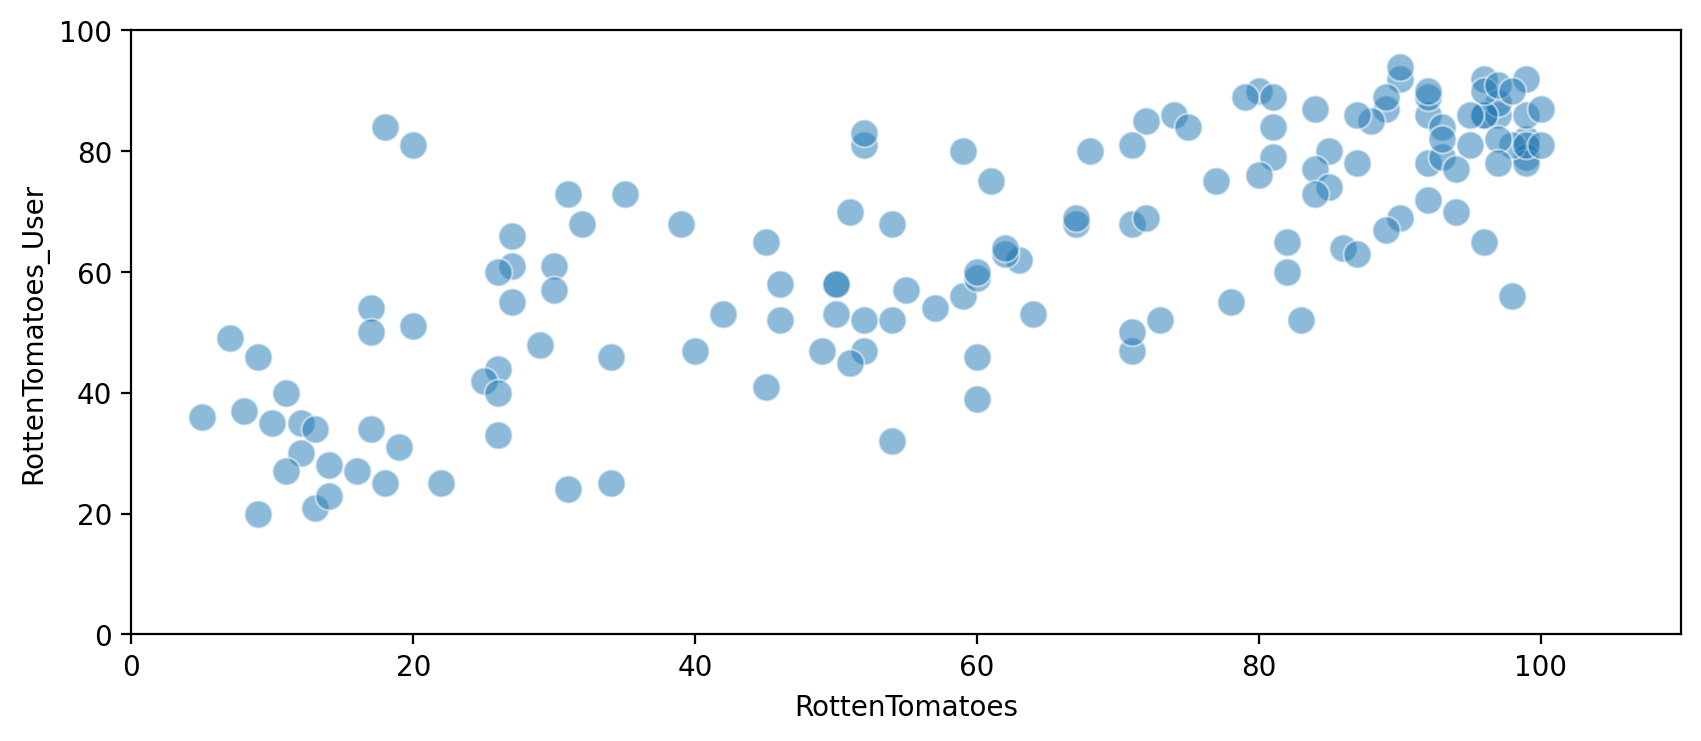

In [32]:
plt.figure(figsize=(10,4), dpi=200)

sns.scatterplot(data=df2, x='RottenTomatoes',y='RottenTomatoes_User',s=100, alpha=0.5)
plt.ylim(0,100)
plt.xlim(0,110)

In [33]:
df2['RT_Diff'] = df2['RottenTomatoes'] - df2['RottenTomatoes_User']

In [34]:
## get the average of the RT_Diff
## but we have to make the differential in absolute form first, in order to get the mean of the differential
df2['RT_Diff'].apply(abs).mean()

15.095890410958905

<AxesSubplot:xlabel='RT_Diff', ylabel='Count'>

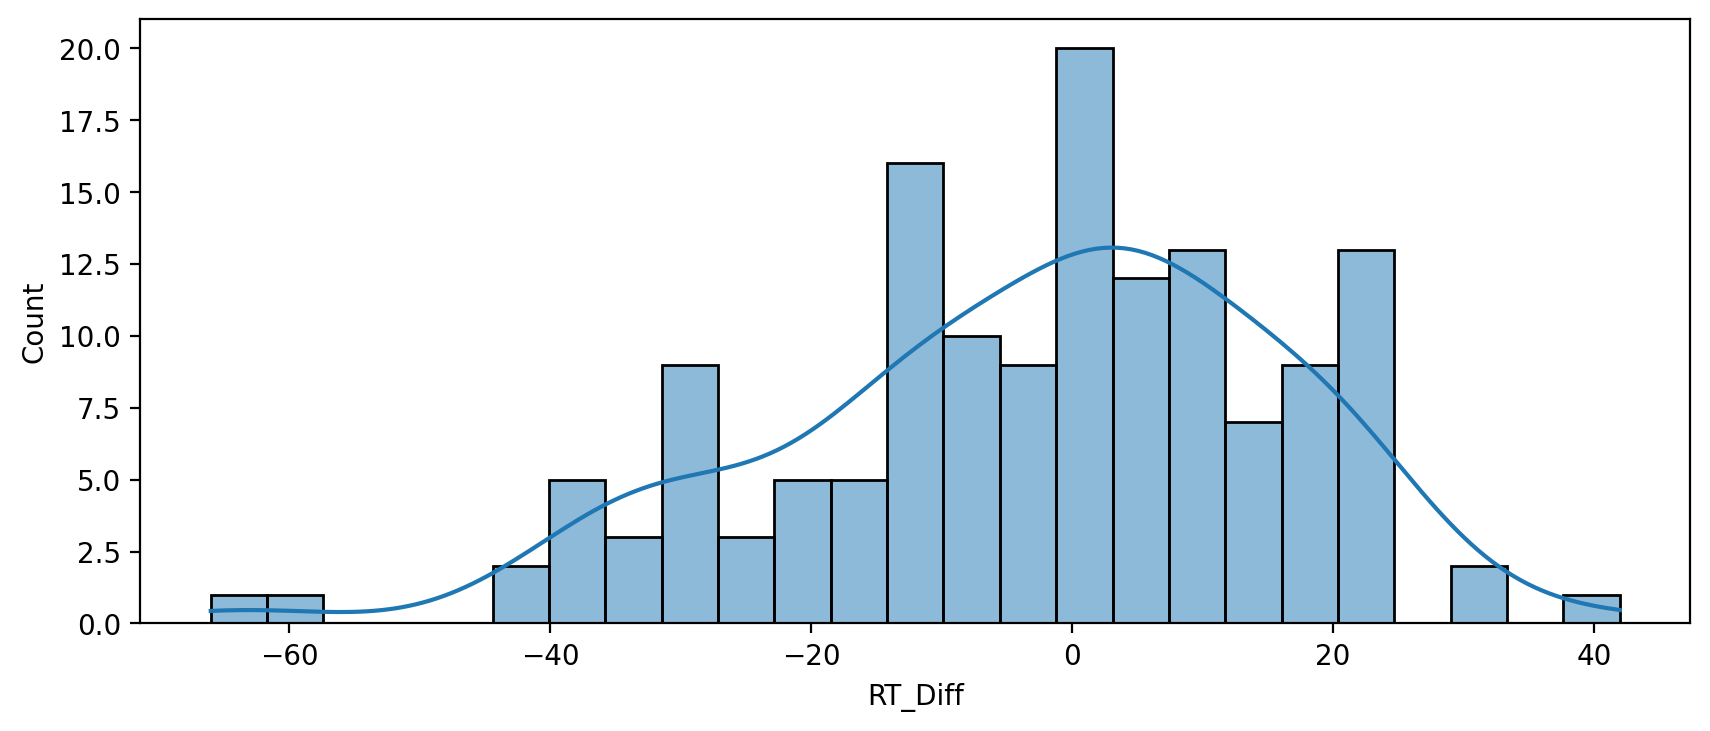

In [35]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df2, x='RT_Diff', kde=True, bins=25)

<AxesSubplot:xlabel='RT_Diff', ylabel='Count'>

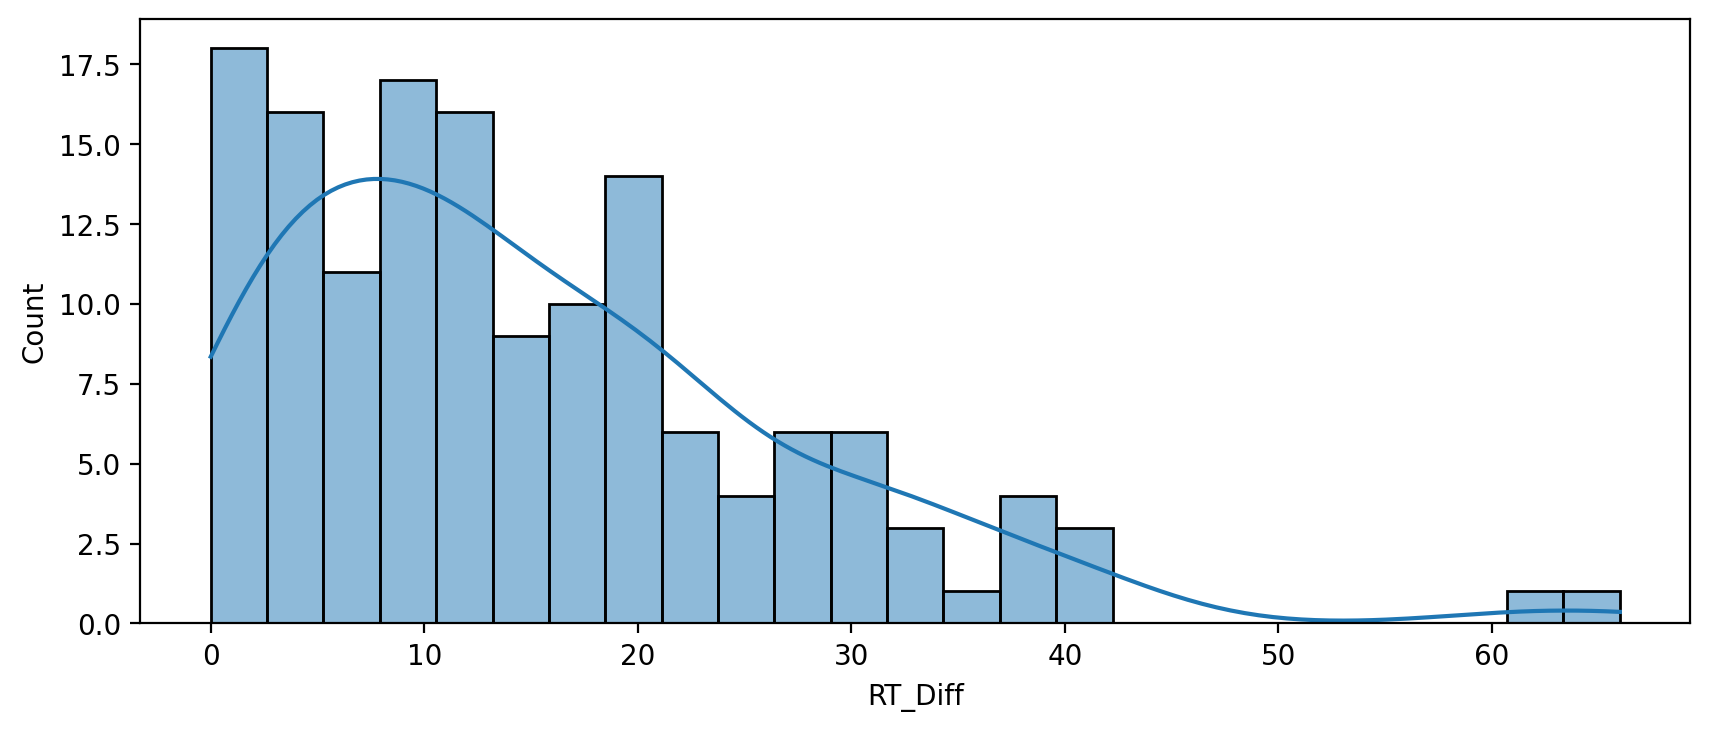

In [36]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df2['RT_Diff'].apply(abs), kde=True, bins=25)

In [37]:
# grab the top 5 movies users rated higher than critics 
# which mean top 5 NEGATIVE values
df2.nsmallest(n=5, columns='RT_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [38]:
# grab the top 5 movies critics rated higher than users
# which mean top 5 POSITIVE values
df2.nlargest(n=5, columns='RT_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


(0.0, 100.0)

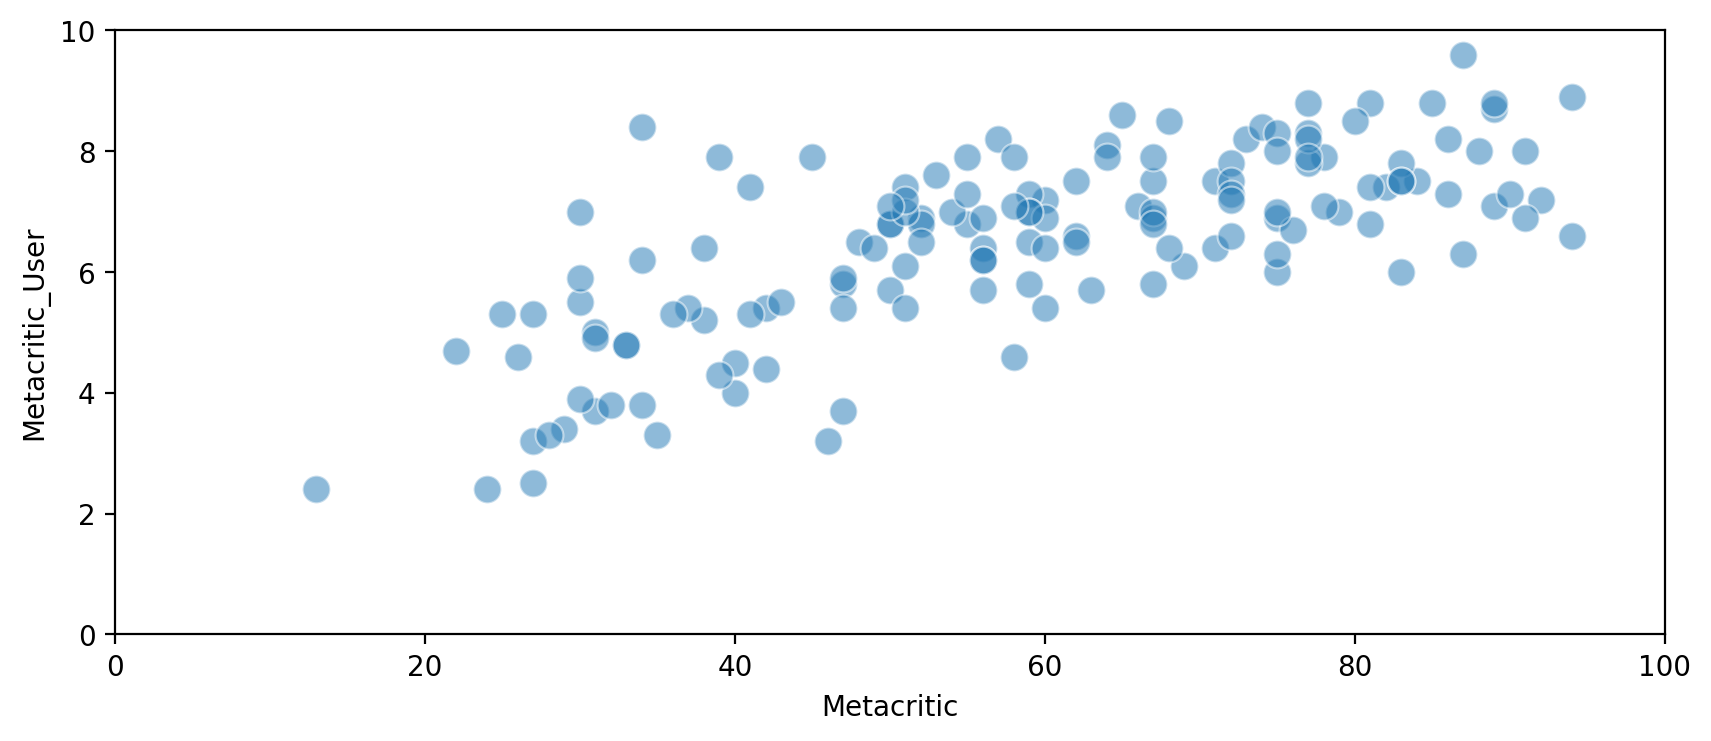

In [39]:
plt.figure(figsize=(10,4), dpi=200)

sns.scatterplot(data=df2, x='Metacritic',y='Metacritic_User',s=100, alpha=0.5)
plt.ylim(0,10)
plt.xlim(0,100)

## IMDB

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

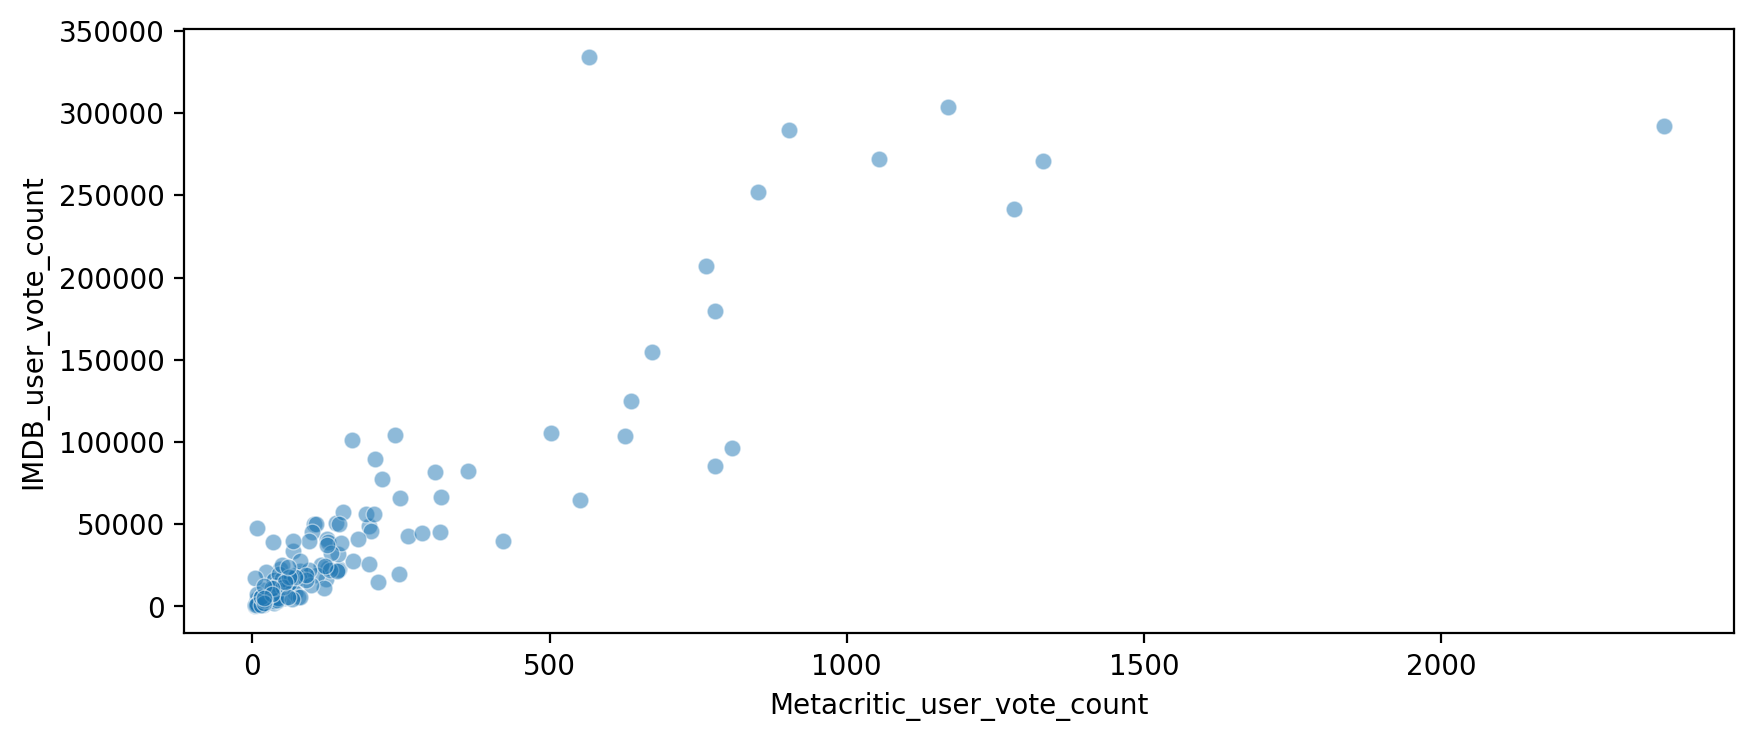

In [40]:
plt.figure(figsize=(10,4), dpi=200)

sns.scatterplot(data=df2, x='Metacritic_user_vote_count',y='IMDB_user_vote_count', alpha=0.5)

we can notice that there are 2 outliers, 1 with the most voters from IMDB and another one with many voters both from IMDB and Metracitics

In [41]:
## let see what those movies are
df2.nlargest(n=1,columns='IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [42]:
df2.nlargest(n=1,columns='Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Fandango Scores vs. All Sites

In [43]:
df_merge = pd.merge(df,df2, on='FILM',how='inner')

In [44]:
df_merge.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


# Normalize columns to Fandago STARS and RATING 0-5

because rotten tomatoes, metacritic and imdb have different scale of rating
therefore, we have to normalize our data to be in the same range

In [47]:
df_merge.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
RT_Diff                           42.0
Name: max, dtype: float64

In [48]:
df_merge['RT_Norm'] = np.round(df_merge['RottenTomatoes']/20,1)

In [50]:
df_merge['RTU_Norm'] = np.round(df_merge['RottenTomatoes_User']/20,1)

In [51]:
df_merge['Meta_Norm'] = np.round(df_merge['Metacritic']/20,1)

In [52]:
df_merge['Meta_U_Norm'] = np.round(df_merge['Metacritic_User']/2,1)

In [53]:
df_merge['IMDB_Norm'] = np.round(df_merge['IMDB']/2,1)

In [54]:
df_merge.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [56]:
df_merge.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'RT_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [59]:
norm_df = df_merge[['STARS','RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [61]:
norm_df.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


# Comparing Distribution of Scores Across Sites

In [74]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

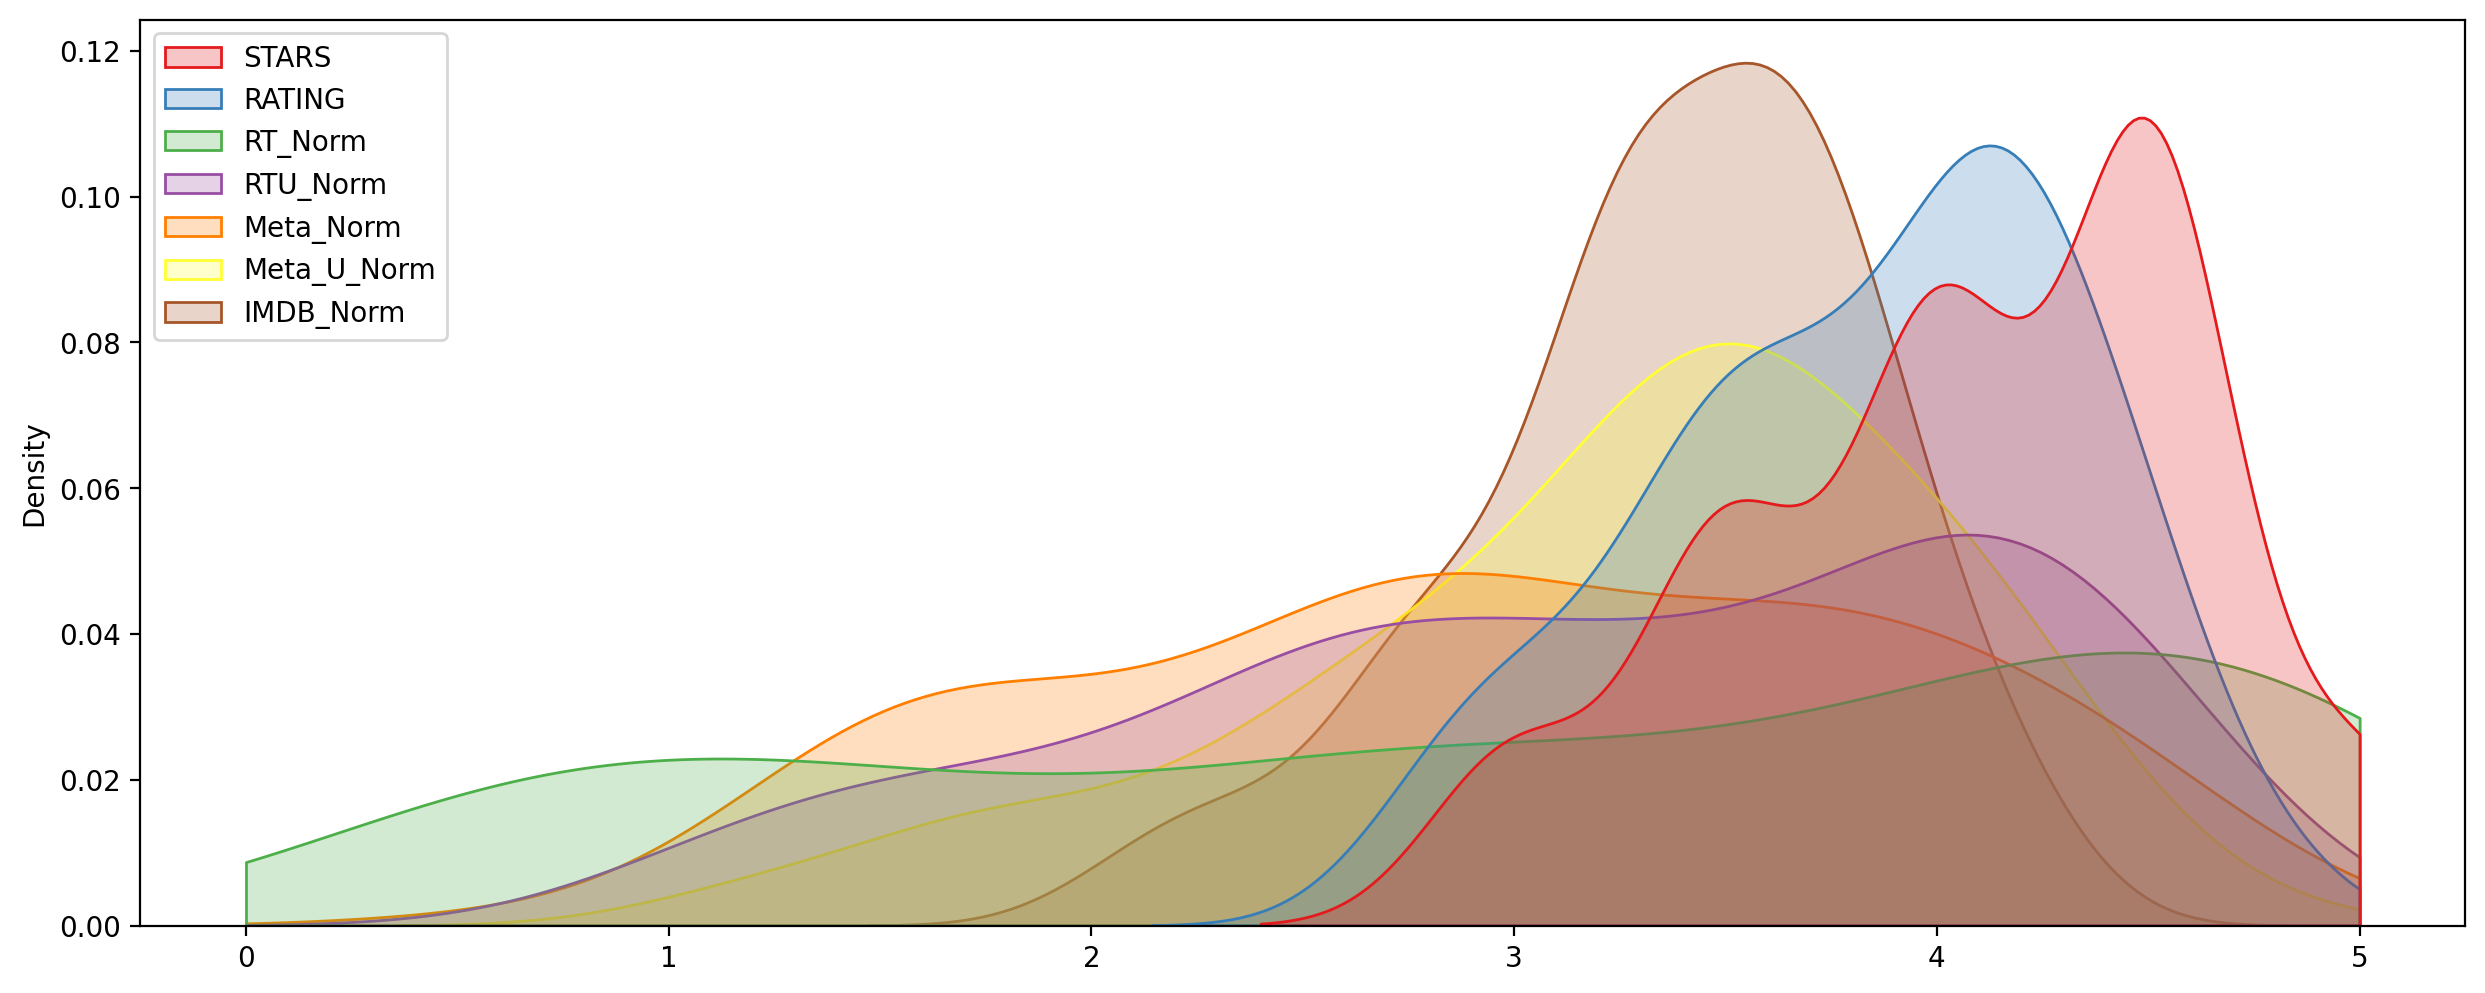

In [75]:
fig, ax= plt.subplots(figsize=(15,6), dpi=200)
sns.kdeplot(data=norm_df, shade=True, clip=[0,5], palette='Set1')

move_legend(ax, "upper left")

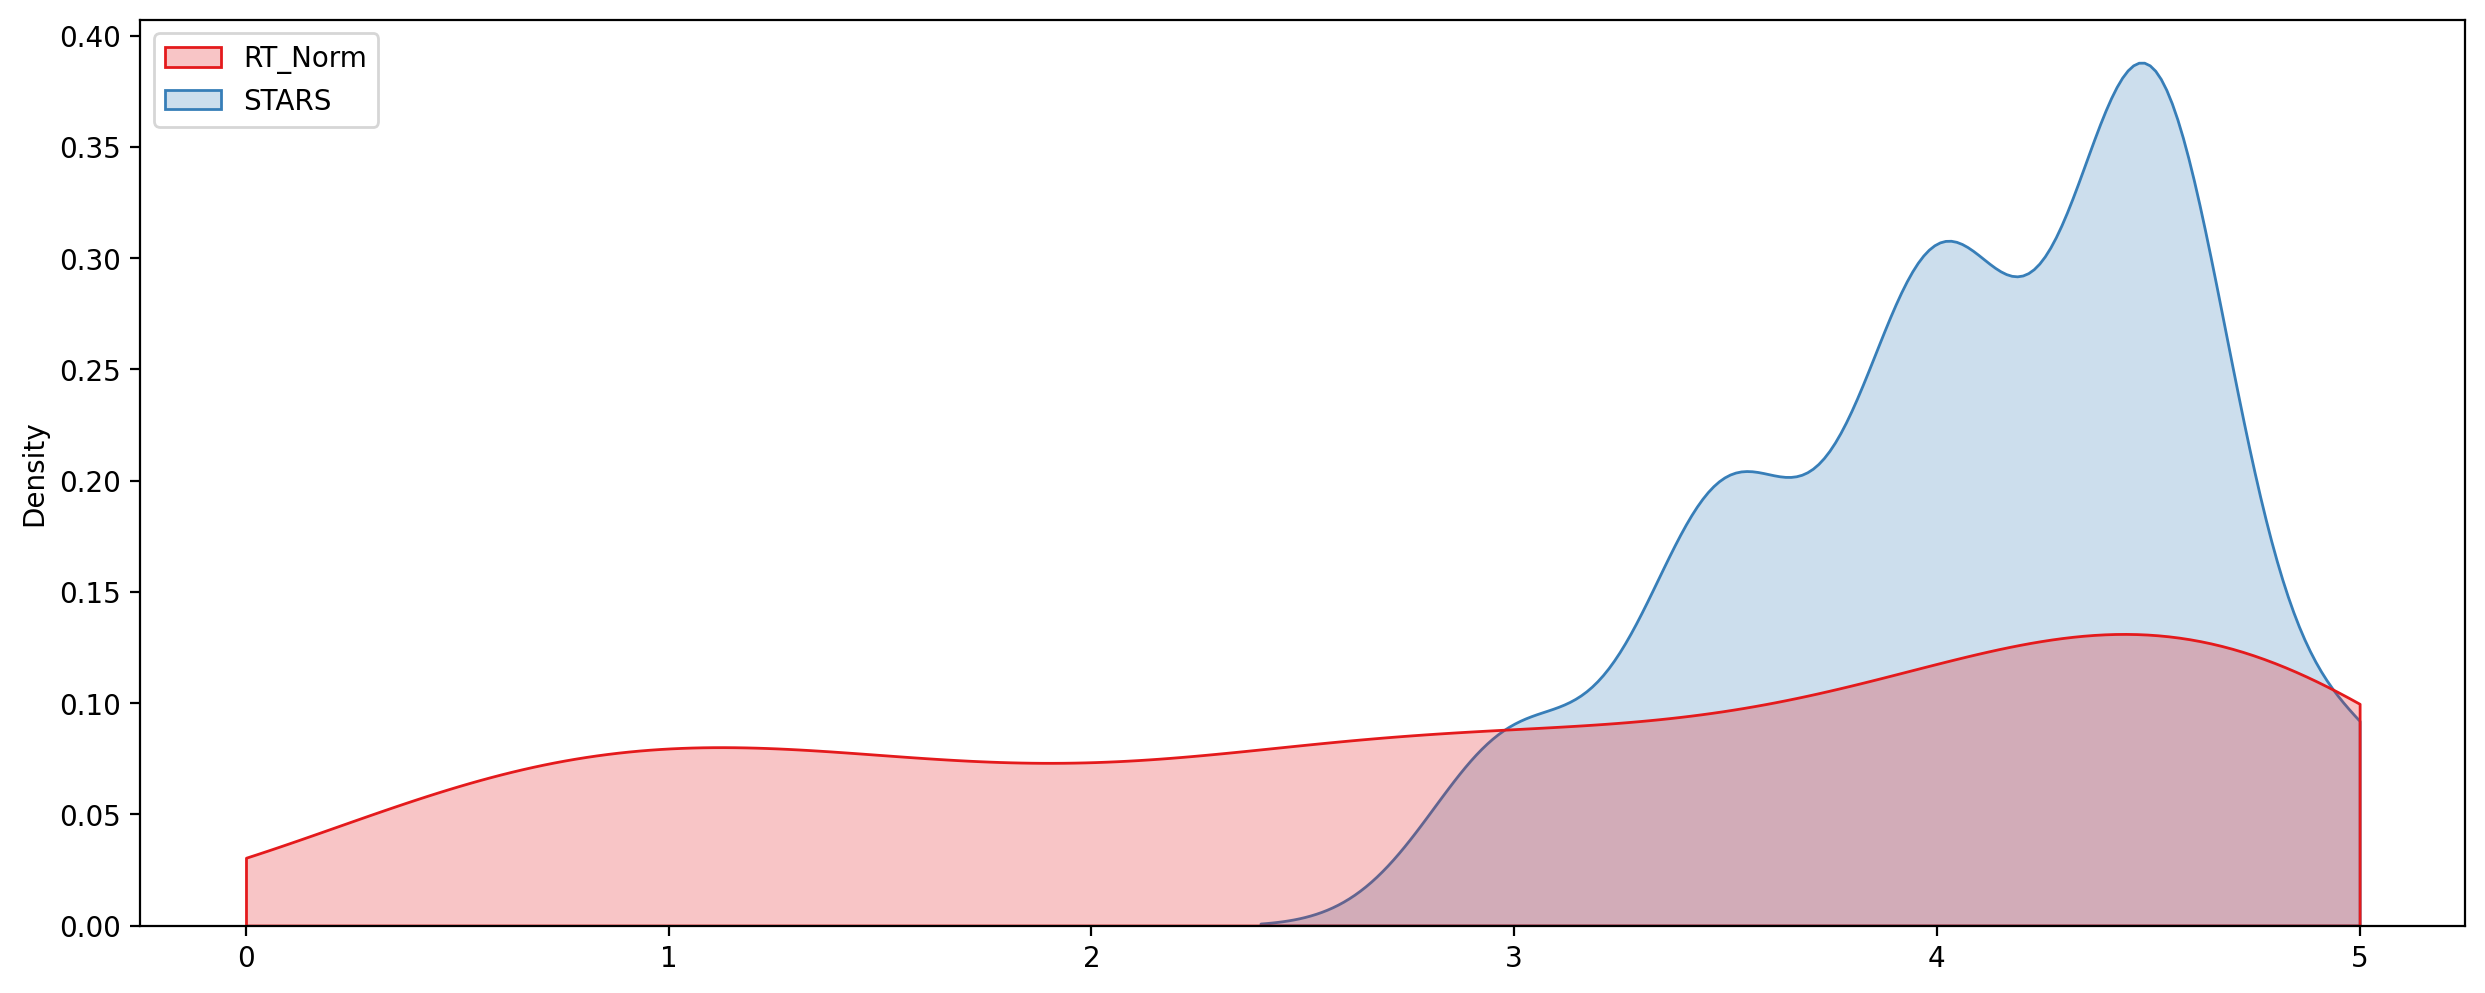

In [76]:
fig, ax= plt.subplots(figsize=(15,6), dpi=200)
sns.kdeplot(data=norm_df[['RT_Norm','STARS']], shade=True, clip=[0,5], palette='Set1')

move_legend(ax, "upper left")

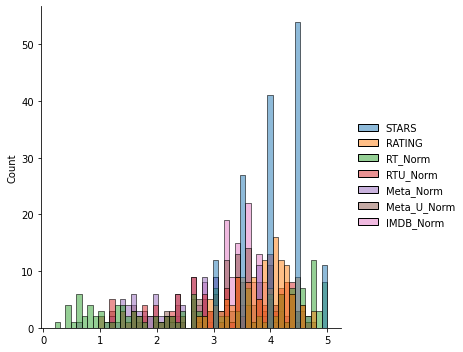

In [79]:
sns.displot(data=norm_df,bins=50)

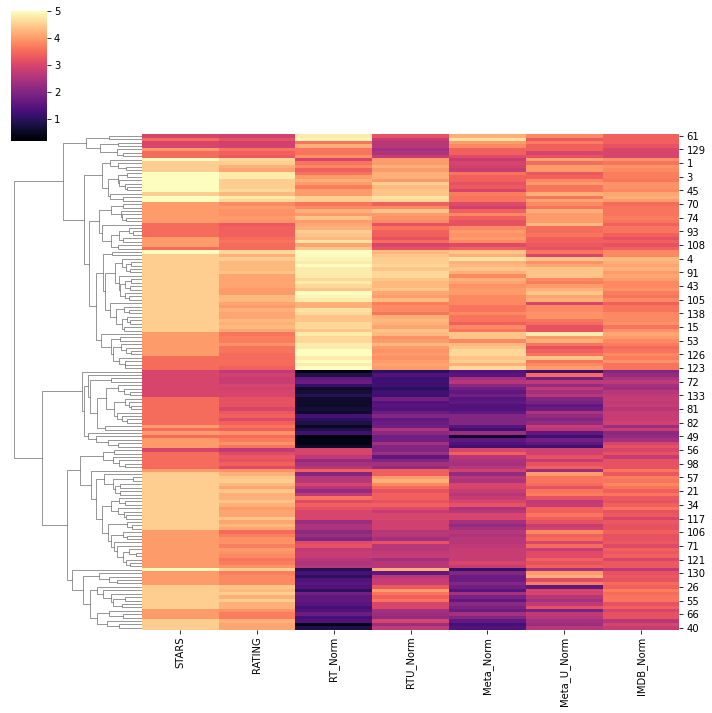

In [80]:
sns.clustermap(norm_df, cmap='magma', col_cluster=False)

In [81]:
norm_df.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [85]:
norm_films = df_merge[['FILM','STARS','RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm']]

In [88]:
worst_film = norm_films.nsmallest(n=10, columns='RT_Norm')

In [89]:
worst_film

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


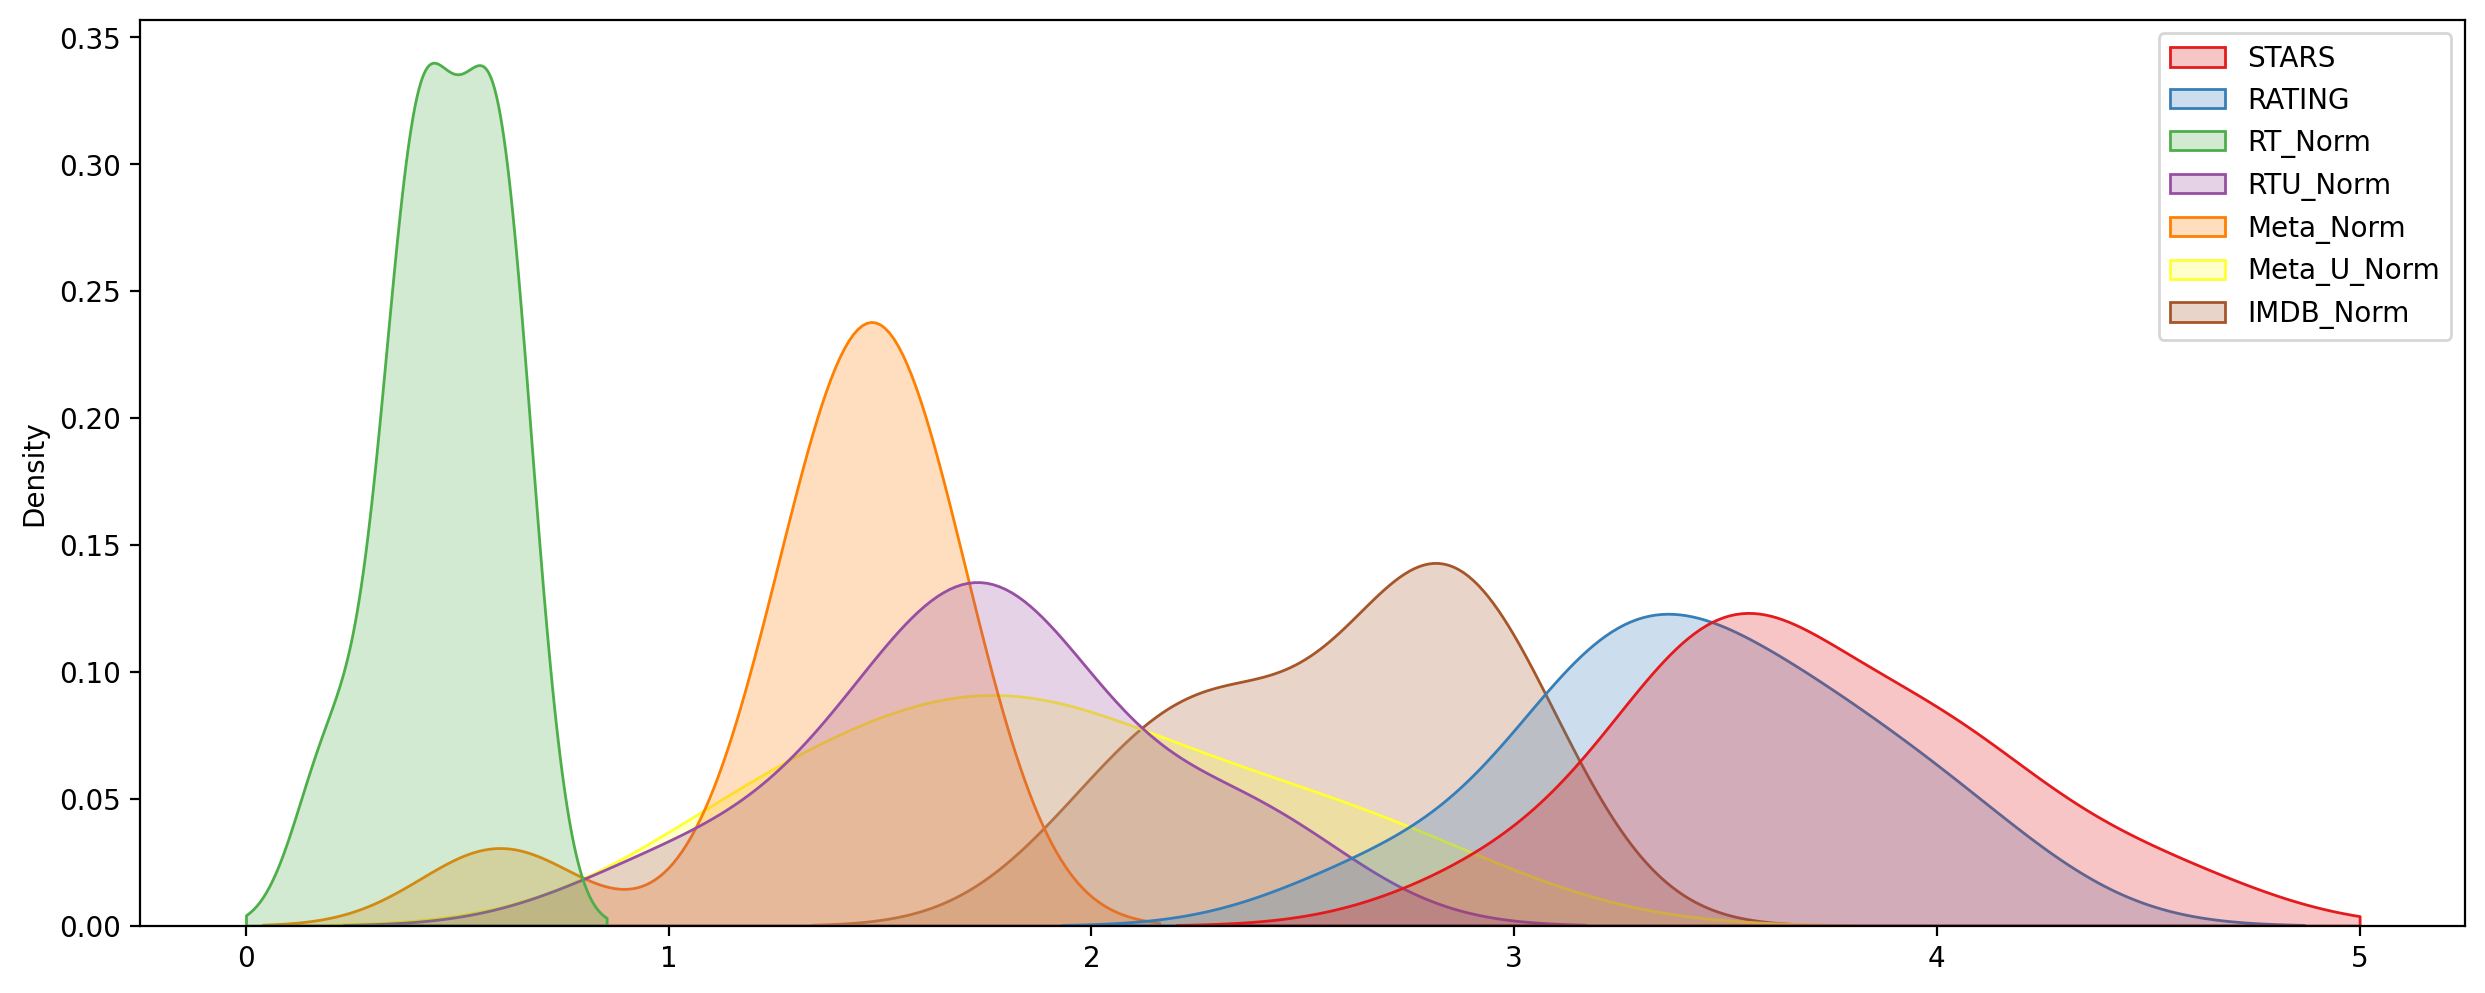

In [91]:
fig, ax= plt.subplots(figsize=(15,6), dpi=200)
sns.kdeplot(data=worst_film, shade=True, clip=[0,5], palette='Set1')

move_legend(ax, "upper right")

In [93]:
worst_film.iloc[1]

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
Name: 25, dtype: object

In [94]:
# Taken Stars from FANDANGO
worst_film['STARS'].iloc[1]

4.5

In [95]:
## average stars from other critic organizations
(0.4+2.3+1.3+2.3+3)/5

1.86